In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [104]:
polygon_example_1 = [(5, 5), (3, 4), (6, 3), (4, 2), (6, 0), (7, 1), (8, 4)]
polygon_example_2 = [(2, 0), (5, 1), (6, 0), (8, 3), (7, 2), (8, 7), (6, 9), (5, 8),
                     (2, 9), (1, 7), (2, 4), (4, 5), (3, 6), (5, 7), (5.5, 3), (2, 2), (1, 3), (0, 1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                       (polygon_example_1[2], polygon_example_1[5]),
                       (polygon_example_1[2], polygon_example_1[6]),
                       #   (polygon_example_1[6], polygon_example_1[3]),
                       (polygon_example_1[2], polygon_example_1[4]),
                       ]

In [105]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [106]:
def draw_polygon_colors(polygon, colors):
    points_start = []
    points_end = []
    points_connect = []
    points_divide = []
    points_regular = []
    for i in range(len(polygon)):
        if colors[i] == 0:
            points_start.append(polygon[i])
        elif colors[i] == 1:
            points_end.append(polygon[i])
        elif colors[i] == 2:
            points_connect.append(polygon[i])
        elif colors[i] == 3:
            points_divide.append(polygon[i])
        elif colors[i] == 4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end = ['red']
    color_connect = ['blue']
    color_divide = ['cyan']
    color_regular = ['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [107]:
def draw_polygon_tri(polygon, tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

In [108]:
# %matplotlib inline
draw_polygon(polygon_example_2)

Do tego celu wygeneruj wielokąt.

In [136]:
%matplotlib tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button


def dist(point1, point2):
    return np.sqrt(np.power(point1[0] - point2[0], 2) + np.power(point1[1] - point2[1], 2))


TOLERANCE = 0.01


class myPlot:
    def __init__(self, polygon=None) -> None:
        fig, ax = plt.subplots()
        fig.subplots_adjust(bottom=0.2)
        fig.canvas.mpl_connect('button_press_event', self.on_click)
        self.fig = fig
        # ax = plt.axes(autoscale_on=False)
        self.ax = ax
        self.points = []
        self.lines = []
        self.polygons = []
        self.autoscaling = False
        if polygon is not None:
            self.load_polygon(polygon)

        self.closed = False

    def load_polygon(self, polygon):
        self.polygons.append(polygon)
        for i in range(len(polygon)):
            p1 = polygon[i]
            p2 = polygon[(i+1) % len(polygon)]
            self.add_line(plt.Line2D([p1[0], p2[0]], [p1[1], p2[1]]))
            self.add_point(p2)
        self.closed = True
        self.autoscaling = True
        self.draw()

    def reset(self, event):
        self.add_new_polygon(event)
        self.polygons = []
        self.draw()

    def print_polygons(self, event):
        if len(self.polygons) == 0:
            print("Nie ma zapisanych wielokątów")

        for polygon in self.polygons:
            print(polygon)

    def add_new_polygon(self, event):
        self.points = []
        self.lines = []
        self.closed = False
        self.autoscaling = False
        self.draw()

    def undo(self, event):
        if len(self.points) > 0:
            self.points.pop()
        if len(self.lines) > 0:
            self.lines.pop()
        if self.closed:
            self.closed = False
            if len(self.polygons) > 0:
                self.polygons.pop()

        self.draw()

    def add_point(self, point):
        self.points.append(point)

    def add_line(self, line):
        self.lines.append(line)

    def close_polygon(self, event):
        x = event.xdata
        y = event.ydata
        for point in self.points:
            if dist(point, [x, y]) < (np.mean([self.ax.get_xlim(), self.ax.get_ylim()])*TOLERANCE):
                return *point, True
        return x, y, False

    def save_polygon(self):
        lines = self.lines
        polygon = []
        for line in lines:
            polygon.append(
                (line.get_xdata()[0], line.get_ydata()[0]))

        self.polygons.append(polygon)
        # print(polygon)

    def on_click(self, event):
        if event.inaxes != self.ax:
            return
        x, y, closed = self.close_polygon(event)
        if len(self.points) == 0:
            self.add_point([x, y])
        else:
            p1 = self.points[-1]
            p2 = [x, y]
            # Create a line using x and y coordinates
            self.add_line(plt.Line2D([p1[0], p2[0]], [p1[1], p2[1]]))
            self.add_point(p2)
        self.closed = closed
        if self.closed:
            self.save_polygon()
        self.draw()

    def draw(self):
        xlim = self.ax.get_xlim()
        ylim = self.ax.get_ylim()
        self.ax.clear()
        if len(self.points) > 0:
            point = self.points[-1]
            self.ax.scatter(point[0], point[1], color='black')
        for line in self.lines:
            self.ax.add_line(line)
        self.ax.autoscale(self.autoscaling)
        if not self.autoscaling:
            self.ax.set_xlim(xlim)
            self.ax.set_ylim(ylim)
        plt.draw()

    def show(self):
        plt.show()


polygon_example_1 = [(5, 5), (3, 4), (6, 3), (4, 2), (6, 0), (7, 1), (8, 4)]
myplot = myPlot()
fig = myplot.fig


# # create buttons
button_y = 0.05
button_width = 0.2
button_height = 0.1
button_n = 4
button_pos = [[i*button_width*1.1+0.1, button_y, button_width,
               button_height] for i in range(button_n)]
axes = [fig.add_axes(pos) for pos in button_pos]
bundo = Button(axes[0], 'Undo')
bundo.on_clicked(myplot.undo)
bnew = Button(axes[1], 'Add new')
bnew.on_clicked(myplot.add_new_polygon)
bprint = Button(axes[2], 'Print polygons')
bprint.on_clicked(myplot.print_polygons)
breset = Button(axes[3], 'Reset')
breset.on_clicked(myplot.reset)

myplot.show()

[(0.11895161290322578, 0.10416666666666657), (0.8467741935483871, 0.12561274509803916), (0.5866935483870968, 0.275735294117647), (0.8366935483870968, 0.4534313725490196), (0.5705645161290323, 0.588235294117647), (0.8286290322580645, 0.738357843137255), (0.5745967741935484, 0.8670343137254903), (0.8447580645161291, 0.9834558823529413), (0.4415322580645161, 0.974264705882353)]


In [110]:
%matplotlib inline

In [137]:
polygon = [(0.11895161290322578, 0.10416666666666657), (0.8467741935483871, 0.12561274509803916), (0.5866935483870968, 0.275735294117647), (0.8366935483870968, 0.4534313725490196), (0.5705645161290323,
                                                                                                                                                                                      0.588235294117647), (0.8286290322580645, 0.738357843137255), (0.5745967741935484, 0.8670343137254903), (0.8447580645161291, 0.9834558823529413), (0.4415322580645161, 0.974264705882353)]
polygon1 = [(0.8024193548387096, 0.6893382352941178), (0.6391129032258065, 0.9221813725490198), (0.5685483870967742, 0.6556372549019607), (0.497983870967742,
                                                                                                                                           0.49938725490196073), (0.3951612903225806, 0.3645833333333333), (0.18145161290322578, 0.3063725490196078), (0.6754032258064516, 0.08272058823529405)]
polygon2 = [(0.7862903225806451, 0.7199754901960784), (0.592741935483871, 0.8517156862745099), (0.5201612903225806, 0.5330882352941175), (0.3931451612903226,
                                                                                                                                          0.41053921568627444), (0.25604838709677413, 0.41053921568627444), (0.11088709677419353, 0.4534313725490196), (0.5362903225806451, 0.039828431372548934)]

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [112]:
def find_index_of_highest(points, reversed=False, eps=0):
    p0_idx = 0
    p0 = points[0]
    def compare(x, y): return x > y if reversed else x < y
    for i in range(1, len(points)):
        if compare(p0[1], points[i][1]) or (abs(p0[1] - points[i][1]) <= eps and p0[0] > points[i][0]):
            p0 = points[i]
            p0_idx = i
    return p0_idx

In [113]:
def prevNbour(i, n): return i-1 if i > 0 else n-1

In [114]:
def nextNbour(i, n): return (i+1) % n

In [115]:
def is_y_monotonic(polygon, return_chain=False):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    n = len(polygon)

    if n < 4:
        return True
    pTop = find_index_of_highest(polygon)
    pBottom = find_index_of_highest(polygon, reversed=True)
    i = nextNbour(pTop, n)
    prev_y = polygon[pTop][1]
    leftChain = []
    while i != pBottom:
        curr_y = polygon[i][1]
        leftChain.append(i)
        if curr_y > prev_y:
            return False
        prev_y = curr_y
        i = nextNbour(i, n)
    i = prevNbour(pTop, n)
    prev_y = polygon[pTop][1]
    rightChain = []
    while i != pBottom:
        curr_y = polygon[i][1]
        rightChain.append(i)
        if curr_y > prev_y:
            return False
        prev_y = curr_y
        i = prevNbour(i, n)

    chain = [pTop]
    i = 0
    j = 0
    while i < len(leftChain) and j < len(rightChain):
        if polygon[leftChain[i]][1] > polygon[rightChain[j]][1]:
            chain.append(leftChain[i])
            i += 1
        else:
            chain.append(rightChain[j])
            j += 1
    while i < len(leftChain):
        chain.append(leftChain[i])
        i += 1
    while j < len(rightChain):
        chain.append(rightChain[j])
        j += 1
    chain.append(pBottom)
    if return_chain:
        return True, chain
    return True

Przeprowadź test poprawności powyższej funkcji.

In [116]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.002s


Sprawdź monotoniczność swojego wielokątu.

In [117]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

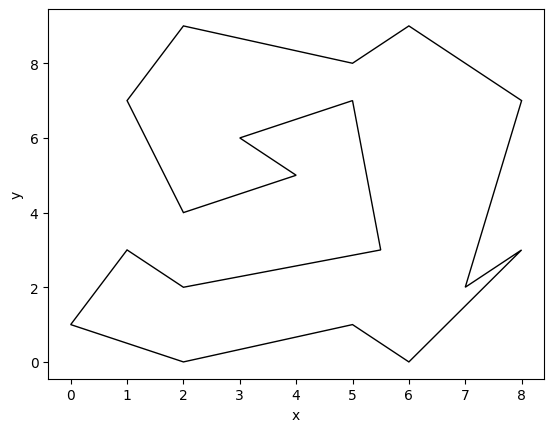

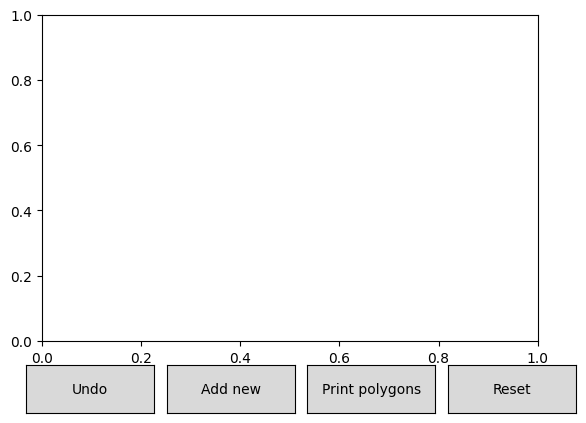

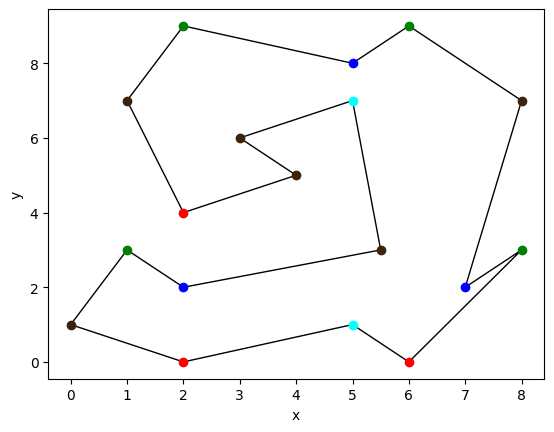

In [118]:
draw_polygon_colors(polygon_example_2, polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [119]:
def mat_det(a, b, c):
    ax, ay = a
    bx, by = b
    cx, cy = c
    return (bx-ax)*(cy-by)-(by-ay)*(cx-bx)

In [120]:
# Labels consts
START = "start"
END = "end"
CONNECT = "connect"
DIVIDE = "divide"
REGULAR = "regular"
COLORS_LABELS = {START: 0, END: 1, CONNECT: 2, DIVIDE: 3, REGULAR: 4}

In [121]:
def color_vertex(polygon, colors=COLORS_LABELS):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    categorized = [0 for _ in range(n)]
    for p in range(n):
        leftP = polygon[nextNbour(p, n)]
        midP = polygon[p]
        rightP = polygon[prevNbour(p, n)]
        if midP[1] >= max(leftP[1], rightP[1]):
            # starting - rightP -> midP -> leftP turns to the left => det(left,p,right) > 0
            if mat_det(rightP, midP, leftP) > 0:
                categorized[p] = colors["start"]
            # dividing
            else:
                categorized[p] = colors["divide"]
        elif midP[1] <= min(leftP[1], rightP[1]):
            # ending - rightP -> midP -> leftP turns to the left => det(left,p,right) > 0
            if mat_det(rightP, midP, leftP) > 0:
                categorized[p] = colors["end"]
            # connect
            else:
                categorized[p] = colors["connect"]
        else:
            categorized[p] = colors["regular"]
    return categorized

Przeprowadź test poprawności powyższej funkcji. 

In [122]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.003s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

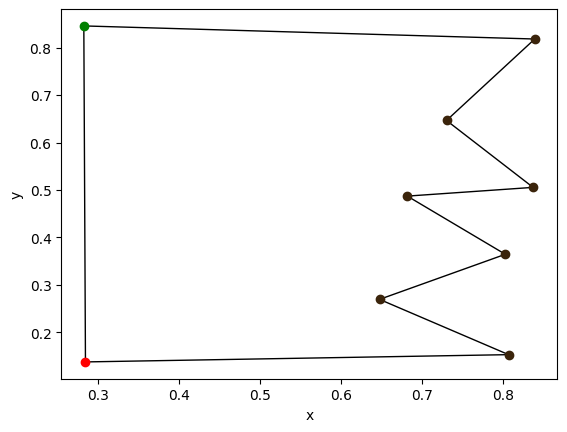

In [123]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon, colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

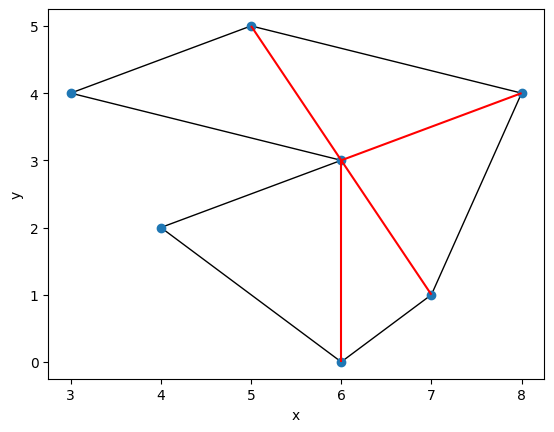

In [124]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [125]:
def onLeftSideOfPolygon(polygon):
    n = len(polygon)
    result = [False for _ in range(n)]
    p = find_index_of_highest(polygon)
    result[p] = True
    p = nextNbour(p, n)
    last = find_index_of_highest(polygon, reversed=True)
    result[last] = True
    while p != last:
        result[p] = True
        p = nextNbour(p, n)

    return result

In [126]:
import operator
import bisect


class Edge:
    def __init__(self, a, b, helperIdx=None) -> None:
        self.diag = sorted([a, b])
        self.helperIdx = helperIdx
        # self.__orderKey = self.firstToRight(0)
        self.__orderKey = self.orderKey()

    def orderKey(self):
        return min(self.diag, key=lambda x: x[0])[0]

    def __eq__(self, other) -> bool:
        return type(self) == type(other) and self.diag == other.diag

    def __lt__(self, other):
        return self.__orderKey < other.__orderKey

    def __gt__(self, other):
        return self.__orderKey > other.__orderKey


class TriBST:

    def __init__(self, polygon, pointsColors, LABELS_COLORS=dict((v, k) for (k, v) in COLORS_LABELS.items())) -> None:
        self.tree = []
        self.polygon = polygon
        self.pointsColors = pointsColors
        self.labels = LABELS_COLORS

    def insertEdge(self, edge: Edge):
        bisect.insort(self.tree, edge)

    def getEdgeHelper(self, edge: Edge):
        if edge.helperIdx is not None:
            return edge.helperIdx
        edgeInState = self.__findEdge(edge)
        if edgeInState != None:
            return edgeInState.helperIdx

    def removeEdge(self, edge):
        i = self.__findEdgeIdx(edge)
        if i != None:
            self.tree.pop(i)

    def createLeftEdge(self, point_idx, helper_idx=None):
        return self.__create_edge_horizonally(point_idx, operator.ge, helper_idx=helper_idx)

    def createRightEdge(self, point_idx, helper_idx=None):
        return self.__create_edge_horizonally(point_idx, operator.le, helper_idx=helper_idx)

    def createHigherEdge(self, point_idx, helper_idx=None):
        return self.__create_edge_vertically(point_idx, "higher", helper_idx=helper_idx)

    def createLowerEdge(self, point_idx, helper_idx=None):
        return self.__create_edge_vertically(point_idx, "lower", helper_idx=helper_idx)

    def __create_edge_vertically(self, point_idx, higher_or_lower, helper_idx=None):
        """Always called with regular point!"""
        polygon = self.polygon
        n = len(polygon)
        func = max if higher_or_lower == "higher" else min
        return Edge(self.polygon[point_idx], func([polygon[prevNbour(point_idx, n)],
                                                  polygon[nextNbour(point_idx, n)]], key=lambda x: x[1]), helper_idx)

    def __create_edge_horizonally(self, point_idx, relate, helper_idx=None):
        polygon = self.polygon
        n = len(polygon)
        candidates = np.array([polygon[prevNbour(point_idx, n)],
                               polygon[nextNbour(point_idx, n)]])

        vert_beetween_neighbours = tuple(np.mean(candidates, axis=0))
        if self.getPointLabel(point_idx) in [START, DIVIDE]:
            relate = operator.le if relate == operator.ge else operator.ge

        for candidate in candidates:
            candidate = tuple(candidate)
            if relate(mat_det(polygon[point_idx],  vert_beetween_neighbours, candidate), 0):
                return Edge(polygon[point_idx], candidate, helper_idx)

    def getPointLabel(self, point_idx):
        if point_idx == None:
            return None
        return self.labels[self.pointsColors[point_idx]]

    def __findFirstLeftEdgeFromX(self, x) -> Edge:
        x = Edge((x, 0), (x, 0))
        i = bisect.bisect(self.tree, x)
        if i != 0:
            return i-1

    def __findEdgeIdx(self, edge: Edge) -> int:
        i = bisect.bisect(self.tree, edge)
        if i < len(self.tree) and self.tree[i] == edge:
            return i
        if i > 0 and self.tree[i-1] == edge:
            return i-1

    def __findEdge(self, edge: Edge) -> Edge:
        i = self.__findEdgeIdx(edge)
        if i != None:
            return self.tree[i]

    def findFirstToTheLeft(self, point_idx):
        while len(self.tree) > 0:
            found_idx = self.__findFirstLeftEdgeFromX(
                self.polygon[point_idx][0])
            found: Edge = self.tree[found_idx]
            if found is not None and min(found.diag, key=lambda x: x[1])[1] < self.polygon[point_idx][1]:
                return found
            self.tree.pop(found_idx)

In [127]:
def checkAndAppendDiagonal(newDiagonals, v, helperIdx, n):
    if nextNbour(helperIdx, n) != v and prevNbour(helperIdx, n) != v:
        new = (v, helperIdx)
        newDiagonals.append(new)

In [128]:
def divideToMonotonicPolygons(polygon, colors=COLORS_LABELS):
    if is_y_monotonic(polygon):
        return []
    labels = dict((v, k) for k, v in colors.items())
    n = len(polygon)
    colors = color_vertex(polygon)

    isPointOnLeft = onLeftSideOfPolygon(polygon)
    # Struktura zdarzeń
    pointsOrder = [i for i in range(n)]
    pointsOrder = sorted(
        pointsOrder, key=lambda x: (-polygon[x][1], polygon[x][0]))

    # Struktura stanu
    BSC = TriBST(polygon, colors)  # BroomStateController

    newDiagonals = []

    for v in pointsOrder:
        currentLabel = BSC.getPointLabel(v)
        if currentLabel == START:
            leftEdge = BSC.createLeftEdge(v, v)
            BSC.insertEdge(leftEdge)

        elif currentLabel == END:
            leftEdge = BSC.createLeftEdge(v)
            helperIdx = BSC.getEdgeHelper(leftEdge)
            if BSC.getPointLabel(helperIdx) == CONNECT:
                checkAndAppendDiagonal(newDiagonals, v, helperIdx, n)
            BSC.removeEdge(leftEdge)

        elif currentLabel == DIVIDE:
            leftEdgeFromBroom = BSC.findFirstToTheLeft(v)  # ev
            helperIdx = BSC.getEdgeHelper(leftEdgeFromBroom)
            checkAndAppendDiagonal(newDiagonals, v, helperIdx, n)
            leftEdgeFromBroom.helperIdx = v
            rightEdge = BSC.createRightEdge(v, v)
            BSC.insertEdge(rightEdge)

        elif currentLabel == CONNECT:
            rightEdge = BSC.createRightEdge(v)
            helperIdx = BSC.getEdgeHelper(rightEdge)
            if helperIdx != None:
                if labels[colors[helperIdx]] == CONNECT:
                    checkAndAppendDiagonal(newDiagonals, v, helperIdx, n)
                BSC.removeEdge(rightEdge)
            leftEdgeFromBroom = BSC.findFirstToTheLeft(v)
            helperIdx = BSC.getEdgeHelper(leftEdgeFromBroom)
            if BSC.getPointLabel(helperIdx) == CONNECT:
                checkAndAppendDiagonal(newDiagonals, v, helperIdx, n)
            leftEdgeFromBroom.helperIdx = v

        elif currentLabel == REGULAR:
            if isPointOnLeft[v]:
                higherEdge = BSC.createHigherEdge(v)
                helperIdx = BSC.getEdgeHelper(higherEdge)
                if helperIdx != None:
                    if BSC.getPointLabel(helperIdx) == CONNECT:
                        checkAndAppendDiagonal(newDiagonals, v, helperIdx, n)
                    BSC.removeEdge(higherEdge)
                new = BSC.createLowerEdge(v, v)
                BSC.insertEdge(new)
            else:
                leftEdgeFromBroom = BSC.findFirstToTheLeft(v)
                helperIdx = BSC.getEdgeHelper(leftEdgeFromBroom)
                if BSC.getPointLabel(helperIdx) == CONNECT:
                    new = (v, helperIdx)
                    newDiagonals.append(new)
                leftEdgeFromBroom.helperIdx = v

    return newDiagonals

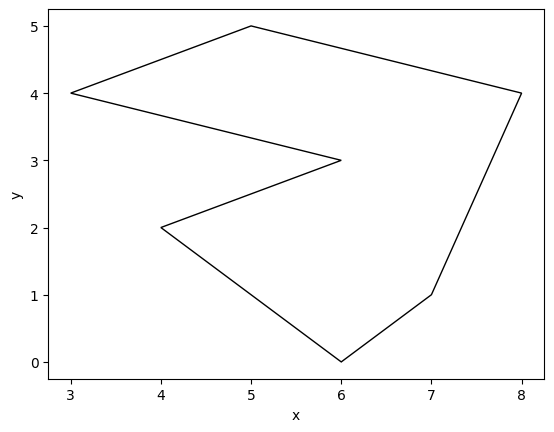

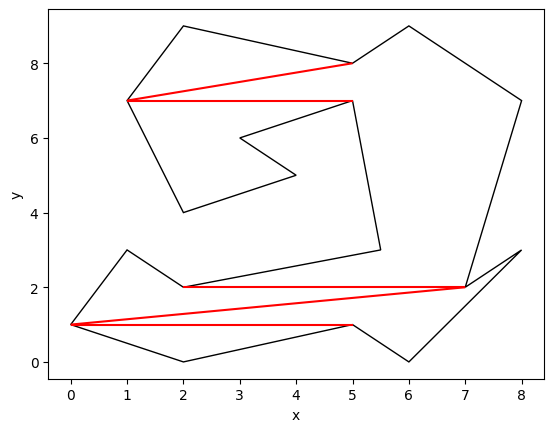

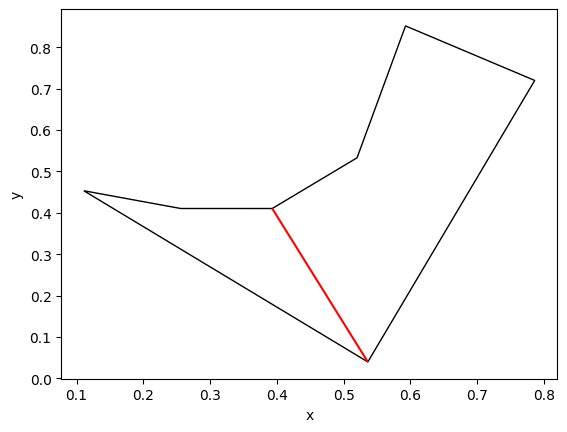

In [129]:
polygon = [tuple(el) for el in polygon]

my_tests_polygon = [polygon_example_1, polygon_example_2, polygon2]
for pol in my_tests_polygon:
    newDiag = divideToMonotonicPolygons(pol)
    vis = Visualizer()
    vis.add_polygon(pol, fill=False)
    for diag in newDiag:
        diagP = [pol[diag[0]], pol[diag[1]]]
        vis.add_line_segment(diagP, color='red')
    vis.show()

In [130]:
def inPolygon(polygon, isPointOnLeft, p, p1, p2) -> bool:
    det = mat_det(polygon[p], polygon[p1], polygon[p2])
    if isPointOnLeft[p]:
        return det < 0
    else:
        return det > 0

In [131]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    n = len(polygon)
    isPointOnLeft = onLeftSideOfPolygon(polygon)
    is_y_monotonic_res = is_y_monotonic(polygon, return_chain=True)
    if is_y_monotonic_res == False:
        return
    chain = is_y_monotonic_res[1]
    S = chain[:2]
    diagonals = []
    for p in chain[2:]:
        if isPointOnLeft[p] != isPointOnLeft[S[-1]]:
            top = S[-1:]
            for v in S:
                # nie dodajemy krawedzi ktore już są dodane
                if v != prevNbour(p, n) and v != nextNbour(p, n):
                    diagonals.append(sorted([p, v]))
            S = top + [p]
        else:
            taken = []
            p2 = S.pop()
            while len(S) > 0:
                p1 = p2
                p2 = S.pop()
                if inPolygon(polygon, isPointOnLeft, p, p1, p2):
                    if p2 != prevNbour(p, n) and p2 != nextNbour(p, n):
                        diagonals.append(sorted([p, p2]))
                else:
                    taken.append(p1)
            S.append(p2)
            S += taken[::-1]
            S.append(p)
    return diagonals
    # res = [tuple(polygon[i] for i in d) for d in diagonals]
    # return res+polygon

In [132]:
def triangulation_draw(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    onStack = 'red'
    done = 'green'
    vis = Visualizer()
    vis.add_polygon(polygon, fill=False)
    n = len(polygon)
    isPointOnLeft = onLeftSideOfPolygon(polygon)
    is_y_monotonic_res = is_y_monotonic(polygon, return_chain=True)
    if is_y_monotonic_res == False:
        return
    chain = is_y_monotonic_res[1]
    S = chain[:2]
    vis.add_point(polygon[S[0]], color=onStack)
    vis.add_point(polygon[S[1]], color=onStack)
    diagonals = []
    for p in chain[2:]:
        if isPointOnLeft[p] != isPointOnLeft[S[-1]]:
            for v in S:
                # nie dodajemy krawedzi ktore już są dodane
                if v != prevNbour(p, n) and v != nextNbour(p, n):
                    diagonals.append(sorted([p, v]))
                    vis.add_line_segment((polygon[p], polygon[v]), color='red')
                # if v != S[-1]:
                vis.add_point(polygon[v], color=done)
            S = [S[-1], p]
        else:
            taken = []
            p2 = S.pop()
            while len(S) > 0:
                p1 = p2
                p2 = S.pop()
                if inPolygon(polygon, isPointOnLeft, p, p1, p2):
                    if p2 != prevNbour(p, n) and p2 != nextNbour(p, n):
                        diagonals.append(sorted([p, p2]))
                        vis.add_line_segment(
                            (polygon[p], polygon[p2]), color='red')
                        # vis.add_point(polygon[p1], color=done)
                        vis.add_point(polygon[p1], color=done)
                else:
                    taken.append(p1)
            S.append(p2)
            # vis.add_point(polygon[p2], color=onStack)
            S += taken[::-1]
            S.append(p)
            vis.add_point(polygon[p], color=onStack)
            # vis.add_point(polygon[p2], color=onStack)
    vis.add_point(polygon[p], color=done)
    return diagonals, vis

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [133]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.011s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

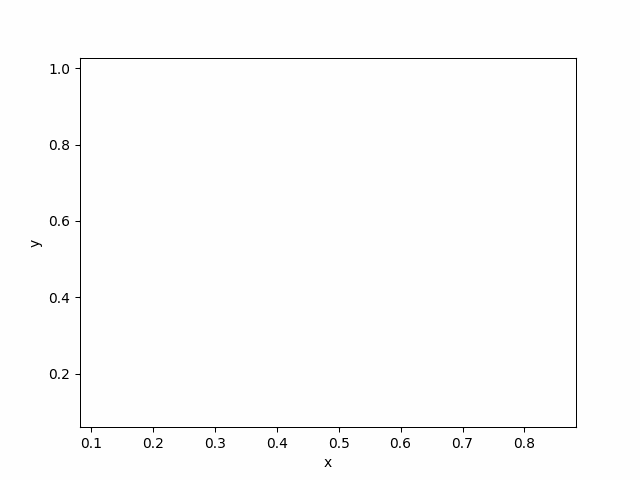

In [138]:
tri, vis = triangulation_draw(polygon)
vis.show_gif(interval=600)

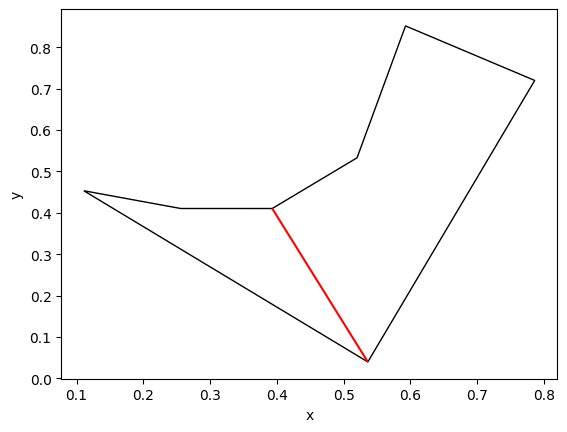

In [98]:
vis.show()